**LIBRARIES**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore')

**Reading the dataset**

In [9]:
data = pd.read_csv("HumanResources.csv", sep=";")
data.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle,Johnson,Female,New York,New York City,High School,13/02/1980,16/04/2016,05/07/2021,Customer Service,Help Desk Technician,81552,Needs Improvement
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,Bachelor,22/09/1987,09/02/2017,14/06/2019,IT,System Administrator,107520,Good
2,00-83197857,Erica,Mcclain,Male,New York,New York City,Bachelor,19/05/1994,03/02/2016,06/03/2021,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany,Johnson,Male,New York,New York City,Bachelor,18/04/1980,06/02/2016,06/11/2018,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery,Wagner,Female,New York,New York City,Bachelor,07/04/1985,11/01/2015,NaN,Operations,Operations Analyst,55581,Satisfactory


**EXPLORATION**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         8950 non-null   object
 1   First Name          8950 non-null   object
 2   Last Name           8950 non-null   object
 3   Gender              8950 non-null   object
 4   State               8950 non-null   object
 5   City                8950 non-null   object
 6   Education Level     8950 non-null   object
 7   Birthdate           8950 non-null   object
 8   Hiredate            8950 non-null   object
 9   Termdate            966 non-null    object
 10  Department          8950 non-null   object
 11  Job Title           8950 non-null   object
 12  Salary              8950 non-null   int64 
 13  Performance Rating  8950 non-null   object
dtypes: int64(1), object(13)
memory usage: 979.0+ KB


In [15]:
data.shape

(8950, 14)

In [17]:
data.describe()

,Salary
count,8950.000000
mean,70964.213520
std,13763.126237
min,51835.000000
25%,60920.500000
50%,66592.500000
75%,78600.500000
max,149377.000000


**Total Number of People Hired**

In [19]:
total_hired = data["Employee_ID"].count()
total_hired

8950

In [21]:
# if there are nunique IDs
total_hired = data["Employee_ID"].nunique()
total_hired

8950

**Total Number of Terminated People**

In [26]:
terminated = data["Termdate"].notna().sum()
terminated

966

**Departments**

In [30]:
data["Department"].nunique()

7

In [38]:
departments = data["Department"].unique().tolist()
departments

['Customer Service', 'IT', 'Operations', 'Finance', 'Marketing', 'HR', 'Sales']

In [49]:
hired_count_by_department = data[data["Termdate"].isna()].groupby("Department")["Employee_ID"].count()
sorted = hired_count_by_department.sort_values(ascending=False)
sorted

Department
Operations          2429
Sales               1634
Customer Service    1489
IT                  1243
Marketing            648
Finance              389
HR                   152
Name: Employee_ID, dtype: int64

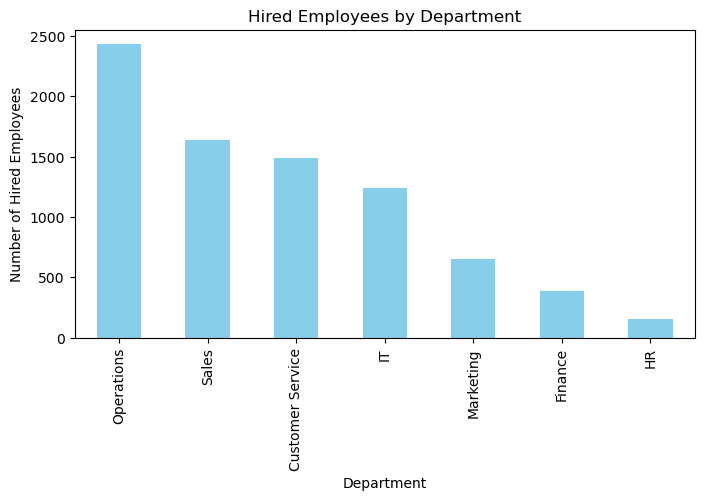

In [55]:
sorted.plot(kind="bar",figsize=(8,4), color="skyblue")
plt.title("Hired Employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of Hired Employees")
plt.show()

**HQ and Branches**

In [60]:
hq_count= (data["State"]== "New York").sum()
branch_count = (data["State"] != "New York").sum()
print(hq_count)
print(branch_count)

6270
2680


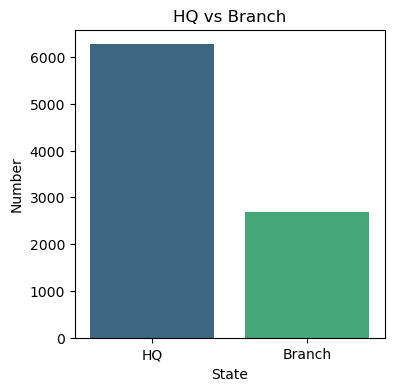

In [72]:
count_data = pd.DataFrame({
    "State_Type": ["HQ", "Branch"],
    "Count": [hq_count, branch_count]})

plt.figure(figsize=(4,4))
sns.barplot(x="State_Type",y= "Count",data=count_data, palette="viridis")
plt.title("HQ vs Branch")
plt.xlabel("State")
plt.ylabel("Number")
plt.show()

**Gender**

In [75]:
number_of_female = (data["Gender"]=="Female").sum()
number_of_male = (data["Gender"]=="Male").sum()
print(number_of_female)
print(number_of_male)

4149
4801


In [77]:
female_hired_count = ((data["Gender"] == "Female") & data["Termdate"].isna()).sum()
print(female_hired_count)
male_hired_count = ((data["Gender"] == "Male") & data["Termdate"].isna()).sum()
print(male_hired_count)

3693
4291


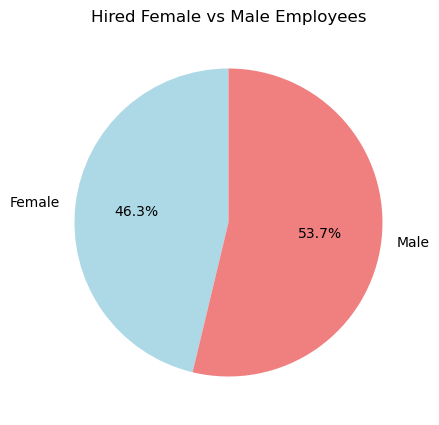

In [81]:
hired_counts = {"Female": female_hired_count, "Male": male_hired_count}
plt.figure(figsize=(5, 5))
plt.pie(hired_counts.values(), labels=hired_counts.keys(), autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightcoral"])
plt.title("Hired Female vs Male Employees")
plt.show()

**Education vs Performance**

In [85]:
performance = data["Performance Rating"].unique()
performance

array(['Needs Improvement', 'Good', 'Satisfactory', 'Excellent'],
      dtype=object)

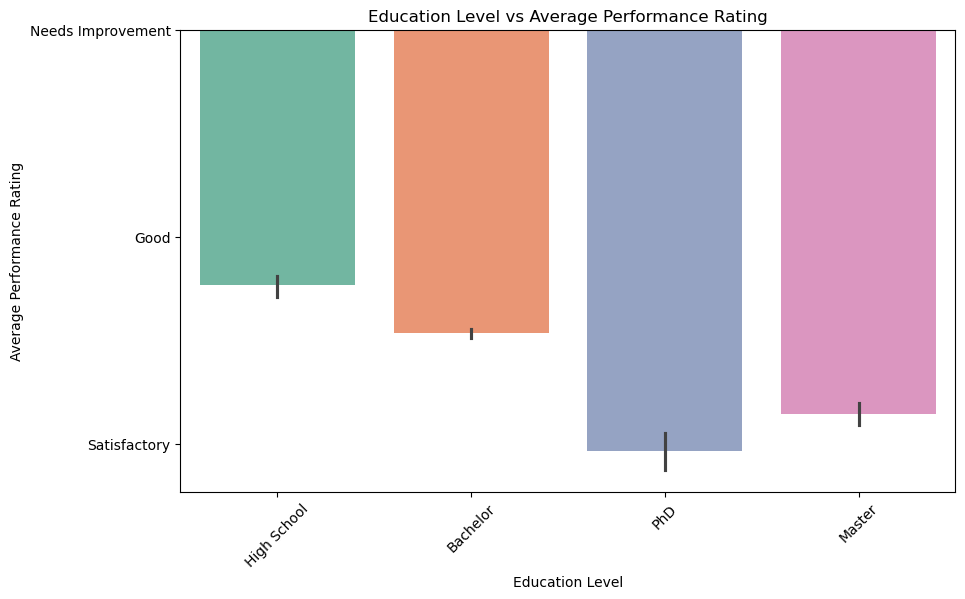

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Education Level", y="Performance Rating", palette="Set2")
plt.title('Education Level vs Average Performance Rating')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Performance Rating')
plt.show()

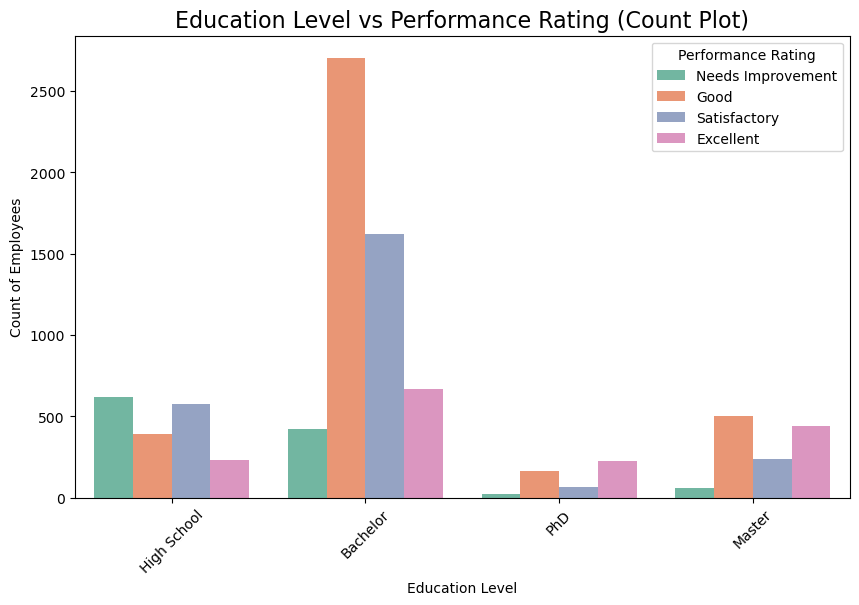

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Education Level', hue='Performance Rating', palette='Set2')

plt.title('Education Level vs Performance Rating (Count Plot)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count of Employees')
plt.show()